In [1]:
import joblib
import numpy as np

# Cargar los meta-modelos para cada columna
meta_models = {
    "Close": joblib.load("metamodel_Close.pkl"),
    "High": joblib.load("metamodel_High.pkl"),
    "Open": joblib.load("metamodel_Open.pkl"),
    "Low": joblib.load("metamodel_Low.pkl")
}

# Función ajustada para preparar características
def prepare_features(features, column):
    """
    Excluye la columna objetivo de las características de entrada.
    Args:
        features (numpy array): Datos originales con 4 columnas.
        column (str): Nombre de la columna a predecir.

    Returns:
        numpy array: Características ajustadas.
    """
    # Columnas disponibles
    columns = ["Open", "High", "Low", "Close"]
    # Índices de las columnas
    col_indices = {col: idx for idx, col in enumerate(columns)}
    # Excluir la columna objetivo
    selected_features = np.delete(features, col_indices[column], axis=1)
    return selected_features

# Función de predicción ajustada
def predict(features, column):
    """
    Predice los valores para una columna específica utilizando el meta-modelo.
    Args:
        features (numpy array): Datos originales (4 columnas).
        column (str): Nombre de la columna ('Close', 'High', 'Open', 'Low').

    Returns:
        Predicción final.
    """
    # Preparar las características
    prepared_features = prepare_features(features, column)
    # Cargar el meta-modelo correspondiente
    meta_model = meta_models[column]
    # Realizar la predicción
    final_prediction = meta_model.predict(prepared_features)
    return final_prediction

new_data = np.array([[1.05439,1.05733,1.05711,1.05336]])

    # Realizar predicciones
for column in ["Close", "High", "Open", "Low"]:
    prediction = predict(new_data, column)
    print(f"Predicción para {column}: {prediction}")
    
real_values = {
    "Close": 1.05233,
    "High": 1.05463,
    "Open": 1.05711,
    "Low": 1.05189
}


Predicción para Close: [1.0569208]
Predicción para High: [1.05541911]
Predicción para Open: [1.0544701]
Predicción para Low: [1.054368]


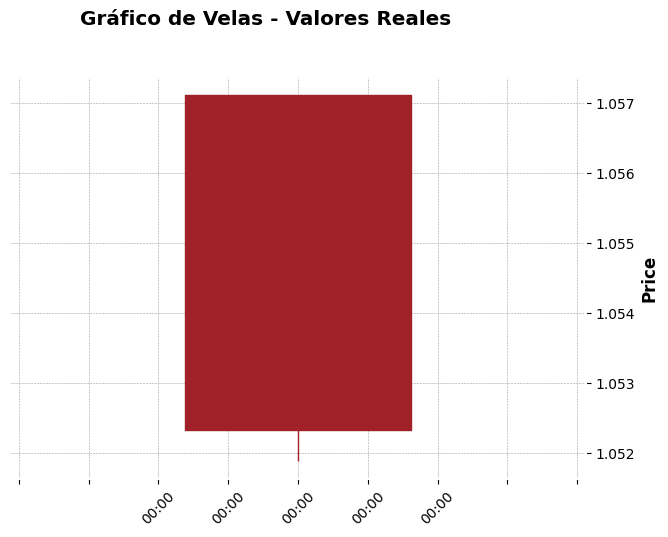

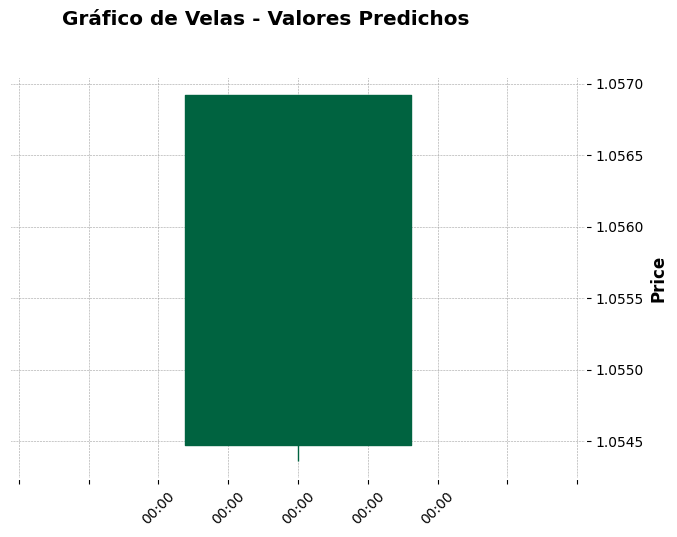

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import mplfinance as mpf

# Valores reales
real_values = {
    "Close": 1.05233,
    "High": 1.05463,
    "Open": 1.05711,
    "Low": 1.05189
}

# Valores predichos
predicted_values = {
    "Close": 1.05692,  # Ejemplo, sustituir por las predicciones generadas
    "High": 1.05541,
    "Open": 1.05447,
    "Low": 1.05436
}

# Crear un DataFrame con los valores
data = {
    "Date": ["2024-11-30"],  # Fecha ficticia para el ejemplo
    "Open": [real_values["Open"]],
    "High": [real_values["High"]],
    "Low": [real_values["Low"]],
    "Close": [real_values["Close"]]
}

df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Añadir valores predichos al DataFrame (opcional para comparación)
predicted_data = {
    "Date": ["2024-12-2"],  # Usar la misma fecha ficticia
    "Open": [predicted_values["Open"]],
    "High": [predicted_values["High"]],
    "Low": [predicted_values["Low"]],
    "Close": [predicted_values["Close"]]
}
predicted_df = pd.DataFrame(predicted_data)
predicted_df["Date"] = pd.to_datetime(predicted_df["Date"])
predicted_df.set_index("Date", inplace=True)

# Gráfica con valores reales
mpf.plot(df, type='candle', style='charles', title="Gráfico de Velas - Valores Reales")

# Gráfica con valores predichos (opcional)
mpf.plot(predicted_df, type='candle', style='charles', title="Gráfico de Velas - Valores Predichos")

plt.show()
